# Data Exploration

### Imports


In [50]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-block alert-warning">
<b>Dask:</b> Multiprocessing package that can be used for (almost all) Pandas & Scikit-learn functionality.
 Ships with Anaconda, but not with MiniConda.
</div>

In [2]:
# from sklearn.grid_search import GridSearchCV
#from dklearn.grid_search import GridSearchCV   # voorbeeld van dklearn => dit gaan we zeker nodig hebben bij hyperopt etc.
# from dask.distributed import Client
# client = Client() # often http://localhost:8787/status

### Load Data In

In [3]:
path_dominic = 'C:/Users/doist/OneDrive/Documenten/Business Analytics/Master/Year 1/Data Mining Techniques/Assignment 2/Data/'
path_titus = '2nd-assignment-dmt-2021/'
df = pd.read_csv(path_dominic+'training_set_VU_DM.csv', parse_dates=['date_time'])
display(df)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,77700,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958343,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,88083,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958344,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,94508,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958345,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,128360,3,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,157.84,1


In [4]:
mem_size = df.memory_usage(index=True).sum() / 1_024**2

print(f"Size in Memory: {mem_size:.0f} MB")

Size in Memory: 2043 MB


In [5]:
# Inspect inferred types
display(df.dtypes)

# Inspect numerical ranges
display(df.describe())
# print('Min. Values')
# print(df.min())
#
# print('Max. Values')
# print(df.max())

srch_id                                 int64
date_time                      datetime64[ns]
site_id                                 int64
visitor_location_country_id             int64
visitor_hist_starrating               float64
visitor_hist_adr_usd                  float64
prop_country_id                         int64
prop_id                                 int64
prop_starrating                         int64
prop_review_score                     float64
prop_brand_bool                         int64
prop_location_score1                  float64
prop_location_score2                  float64
prop_log_historical_price             float64
position                                int64
price_usd                             float64
promotion_flag                          int64
srch_destination_id                     int64
srch_length_of_stay                     int64
srch_booking_window                     int64
srch_adults_count                       int64
srch_children_count               

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


In [6]:
# data types

# # memory + speed improvements
# optimal_dtypes = {'srch_id': np.uint32,
#                   'site_id': np.uint32,
#                   'visitor_location_country_id': np.uint8,
#                   'prop_country_id': np.uint8,
#                   'prop_id': np.uint32,
#                   'prop_starrating': np.uint8,
#                   'prop_brand_bool': np.uint8,
#                   'promotion_flag': (np.uint8,
#                   'srch_destination_id': np.uint16,
#                   'srch_length_of_stay': np.uint16,
#                   'srch_booking_window': np.uint16,
#                   'srch_adults_count': np.uint8,
#                   'srch_children_count': np.uint8,  # 255 kids max should suffice
#                   'srch_room_count': np.uint8,
#                   'srch_saturday_night_bool': np.uint8,
#                   'random_bool': np.uint8,
#                   'position': np.uint8,
#                   'click_bool': np.uint8,
#                   'booking_bool': np.uint8}
#
# for i in range(1, 9):
#     optimal_dtypes[f'comp{i}_rate'] = np.int8,
#     optimal_dtypes[f'comp{i}_inv'] = np.int8,     # assignment does not specify -1 but is exists??
#     # competitor_dtypes[f'comp{i}_rate_percent_diff'] = np.uint


# dfn = df.dtypes(optimal_dtypes)
# print(dfn.dtypes)


## Exploration

### Count of unique values per column:

In [7]:
uniques = df.nunique()
display(uniques)

srch_id                        199795
date_time                      198615
site_id                            34
visitor_location_country_id       210
visitor_hist_starrating           312
visitor_hist_adr_usd             7799
prop_country_id                   172
prop_id                        129113
prop_starrating                     6
prop_review_score                  10
prop_brand_bool                     2
prop_location_score1              337
prop_location_score2             9342
prop_log_historical_price         392
position                           40
price_usd                       76465
promotion_flag                      2
srch_destination_id             18127
srch_length_of_stay                36
srch_booking_window               429
srch_adults_count                   9
srch_children_count                10
srch_room_count                     8
srch_saturday_night_bool            2
srch_query_affinity_score      199387
orig_destination_distance      530595
random_bool 

### % missing values per column

In [8]:
missing_percent = 100 * df.isnull().sum() / df.shape[0]
display(missing_percent)

filled_columns = missing_percent[missing_percent == 0].index.tolist()
print("Non-missing columns:")
display(filled_columns)

srch_id                         0.000000
date_time                       0.000000
site_id                         0.000000
visitor_location_country_id     0.000000
visitor_hist_starrating        94.920364
visitor_hist_adr_usd           94.897735
prop_country_id                 0.000000
prop_id                         0.000000
prop_starrating                 0.000000
prop_review_score               0.148517
prop_brand_bool                 0.000000
prop_location_score1            0.000000
prop_location_score2           21.990151
prop_log_historical_price       0.000000
position                        0.000000
price_usd                       0.000000
promotion_flag                  0.000000
srch_destination_id             0.000000
srch_length_of_stay             0.000000
srch_booking_window             0.000000
srch_adults_count               0.000000
srch_children_count             0.000000
srch_room_count                 0.000000
srch_saturday_night_bool        0.000000
srch_query_affin

Non-missing columns:


['srch_id',
 'date_time',
 'site_id',
 'visitor_location_country_id',
 'prop_country_id',
 'prop_id',
 'prop_starrating',
 'prop_brand_bool',
 'prop_location_score1',
 'prop_log_historical_price',
 'position',
 'price_usd',
 'promotion_flag',
 'srch_destination_id',
 'srch_length_of_stay',
 'srch_booking_window',
 'srch_adults_count',
 'srch_children_count',
 'srch_room_count',
 'srch_saturday_night_bool',
 'random_bool',
 'click_bool',
 'booking_bool']

### Searches per website

In [9]:
groupby_website = df.groupby('site_id')['srch_id'].nunique() / df['srch_id'].nunique()

site_searches =  groupby_website.sort_values(ascending=False)
display(site_searches)
# site 5 == 'expedia.com'??

site_id
5     0.609845
14    0.096849
15    0.063645
24    0.050502
32    0.035406
18    0.027198
16    0.019370
12    0.015841
19    0.010070
22    0.009194
9     0.009054
11    0.007092
7     0.006572
29    0.006256
31    0.005656
26    0.003348
4     0.002768
25    0.002658
23    0.002528
1     0.002518
34    0.002087
10    0.001962
13    0.001782
17    0.001296
2     0.001216
27    0.001146
28    0.000936
30    0.000861
21    0.000756
3     0.000746
6     0.000636
33    0.000165
20    0.000035
8     0.000005
Name: srch_id, dtype: float64

### Clicks/Books per position, grouped by random_bool

In [10]:
# groupby_random_bool = df.groupby('random_bool')[['click_bool', 'booking_bool']].count()
groupby_position = df.groupby(['random_bool', 'position'])[['click_bool', 'booking_bool']].sum()
groupby_random_bool = groupby_position.groupby('random_bool').sum()
click_book_ratio = groupby_position / groupby_random_bool
display(groupby_position)
display(groupby_random_bool)
display(click_book_ratio)

click_bool  booking_bool
random_bool position                          
0           1              29908         27014
            2              20271         17976
            3              15381         13385
            4              12267         10593
            5                149            98
...                          ...           ...
1           36               308            25
            37               157            12
            38                32             4
            39                 7             2
            40                 0             0

[80 rows x 2 columns]

,click_bool,booking_bool
random_bool,,
0,153502,130578
1,68377,7812


click_bool  booking_bool
random_bool position                          
0           1           0.194838      0.206880
            2           0.132057      0.137665
            3           0.100201      0.102506
            4           0.079914      0.081124
            5           0.000971      0.000751
...                          ...           ...
1           36          0.004504      0.003200
            37          0.002296      0.001536
            38          0.000468      0.000512
            39          0.000102      0.000256
            40          0.000000      0.000000

[80 rows x 2 columns]

### Location distributions

In [11]:
groupby_home_country = df.groupby('visitor_location_country_id')['srch_id'].nunique()
distribution_home_country = 100 * (groupby_home_country / df['srch_id'].nunique()).sort_values(ascending=False)
display(distribution_home_country)
# Country 219 == USA??
# Country 100 == UK?? => Ursu (2015) suggests South-korea

groupby_prop_country = df.groupby('prop_country_id')['srch_id'].nunique()
distribution_prop_country = 100 * (groupby_prop_country / df['srch_id'].nunique()).sort_values(ascending=False)
display(distribution_prop_country)

groupby_destination_id = df.groupby('srch_destination_id')['srch_id'].nunique()
distribution_destination_id = 100 * (groupby_destination_id / df['srch_id'].nunique()).sort_values(ascending=False)
display(distribution_destination_id)

# 8192 == NYC??
# 4562 == LA?? Miami??

visitor_location_country_id
219    57.151580
100     9.974724
55      5.956606
216     4.602217
220     3.479066
         ...    
67      0.000501
83      0.000501
94      0.000501
101     0.000501
58      0.000501
Name: srch_id, Length: 210, dtype: float64

prop_country_id
219    59.694687
100     6.304963
55      3.899997
31      3.142221
99      2.876949
         ...    
7       0.001001
165     0.001001
204     0.000501
135     0.000501
126     0.000501
Name: srch_id, Length: 172, dtype: float64

srch_destination_id
8192     1.233264
4562     1.020046
9402     0.689707
10979    0.620136
8347     0.596612
           ...   
19543    0.000501
19542    0.000501
19540    0.000501
9199     0.000501
14212    0.000501
Name: srch_id, Length: 18127, dtype: float64

### Drop Columns

In [12]:
competitor_cols = []
for i in range(1, 9):
    competitor_cols += [f'comp{i}_rate', f'comp{i}_inv', f'comp{i}_rate_percent_diff']
drop_cols = competitor_cols + ['gross_bookings_usd', 'position']

df_stage1 = df.drop(columns=drop_cols)

### More Drops:

In [13]:
# left-over with missings
left_overs = [col
              for col in df_stage1.columns
              if not col in filled_columns]
print("Left-over columns for drop/imputation")
display(missing_percent[left_overs])
drop_cols_extra = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'srch_query_affinity_score']  # voor nu even droppen
df_stage1.drop(columns=drop_cols_extra, inplace=True)


Left-over columns for drop/imputation


visitor_hist_starrating      94.920364
visitor_hist_adr_usd         94.897735
prop_review_score             0.148517
prop_location_score2         21.990151
srch_query_affinity_score    93.598552
orig_destination_distance    32.425766
dtype: float64

## Fill Na
### TODO: prop_review_score per DMT 2020 group 95
#### prop_review_score & prop_location_score2 imputed per country, lower quantile as baseline => cited by VU boys and Liu et al

In [14]:
prop_score = df_stage1.groupby('prop_id')['prop_review_score'].max()
no_reviews = prop_score[prop_score == 0].index
display(no_reviews)
print(f"% properties with no reviews {100 * len(no_reviews) / len(prop_score)}")

# lots of properties with no reviews ever
# option 1: keep imputing like papers do
# option 2: use backfill if reviews show up later and then impute like papers do
# temporarily drop prop_review_score until decision made
df_stage1.drop(columns=['prop_review_score'], inplace=True)

Int64Index([     1,      5,      6,     13,     14,     19,     21,     28,
                34,     44,
            ...
            140783, 140784, 140789, 140793, 140794, 140796, 140802, 140806,
            140818, 140820],
           dtype='int64', name='prop_id', length=29919)

% properties with no reviews 23.17272466753929


In [15]:
# grouped by 'srch_destination_id' (city) would be more precise, but still has some NaN's
country_score2 = df_stage1.groupby('prop_country_id')['prop_location_score2'].quantile(0.25)

score2_country_join = pd.merge(df_stage1, country_score2, on='prop_country_id', how='left')['prop_location_score2_y']
print(f"Still {score2_country_join.isnull().sum()} unsolved NaN's")

# Fill 2 left-overs
score2_country_join[score2_country_join.isnull()] = country_score2.mean()
print(f"Still {score2_country_join.isnull().sum()} unsolved NaN's")

df_stage2 = df_stage1.copy()
nan_mask = df_stage2['prop_location_score2'].isnull()
display(nan_mask)
df_stage2.loc[nan_mask, 'prop_location_score2'] = score2_country_join[nan_mask]

Still 2 unsolved NaN's
Still 0 unsolved NaN's


0          False
1          False
2          False
3          False
4          False
           ...  
4958342    False
4958343    False
4958344    False
4958345    False
4958346     True
Name: prop_location_score2, Length: 4958347, dtype: bool

In [16]:
# TODO: Impute distance matrix using shortest path
# drop for now
df_stage2.drop(columns=['orig_destination_distance'], inplace=True)


In [17]:
# Group 95 does not give an alpha => this needs reasoning
alpha = 0.01
price_usd = df_stage2['price_usd']
price_usd_winsorized = price_usd.clip(lower=price_usd.quantile(alpha), upper=price_usd.quantile(1-alpha))

display(price_usd_winsorized)
outliers = price_usd[price_usd != price_usd_winsorized]
display(outliers)

df_stage3 = df_stage2.copy()
df_stage3['price_usd'] = price_usd_winsorized

0          104.77
1          170.74
2          179.80
3          599.00
4          143.58
            ...  
4958342    118.00
4958343     89.00
4958344     99.00
4958345    139.00
4958346     61.00
Name: price_usd, Length: 4958347, dtype: float64

3          602.77
32         600.00
126         29.00
130         29.00
137         32.00
            ...  
4958162     23.92
4958164     26.79
4958168     33.49
4958300     24.15
4958305     30.31
Name: price_usd, Length: 98760, dtype: float64

## Temporary output

In [18]:
missing_percent = 100 * df_stage3.isnull().sum() / df_stage3.shape[0]
print("% missing:")
display(missing_percent)

df_stage3.to_pickle('df_temporary.pkl')

% missing:


srch_id                        0.0
date_time                      0.0
site_id                        0.0
visitor_location_country_id    0.0
prop_country_id                0.0
prop_id                        0.0
prop_starrating                0.0
prop_brand_bool                0.0
prop_location_score1           0.0
prop_location_score2           0.0
prop_log_historical_price      0.0
price_usd                      0.0
promotion_flag                 0.0
srch_destination_id            0.0
srch_length_of_stay            0.0
srch_booking_window            0.0
srch_adults_count              0.0
srch_children_count            0.0
srch_room_count                0.0
srch_saturday_night_bool       0.0
random_bool                    0.0
click_bool                     0.0
booking_bool                   0.0
dtype: float64

# Feature engineering:

### Bookings seasonality

,date_time,booking_start
0,2013-04-04 08:32:15,2013-04-04 08:32:15
1,2013-04-04 08:32:15,2013-04-04 08:32:15
2,2013-04-04 08:32:15,2013-04-04 08:32:15
3,2013-04-04 08:32:15,2013-04-04 08:32:15
4,2013-04-04 08:32:15,2013-04-04 08:32:15
...,...,...
4958342,2013-06-30 19:55:18,2013-07-21 19:55:18
4958343,2013-06-30 19:55:18,2013-07-21 19:55:18
4958344,2013-06-30 19:55:18,2013-07-21 19:55:18
4958345,2013-06-30 19:55:18,2013-07-21 19:55:18


booking_start_weeknr
1     4631
2     3102
3     3834
4     3441
5     3424
6     4005
7     5306
8     4560
9     4368
10    4905
11    5531
12    5880
13    6694
14    5662
15    4951
16    4988
17    5367
18    5344
19    5253
20    6201
21    7153
22    5608
23    6194
24    6528
25    7358
26    7579
27    6340
28    4334
29    3667
30    3145
31    2705
32    2516
33    2168
34    1586
35    1386
36    1037
37    1087
38    1015
39     718
40     683
41     610
42     478
43     357
44     859
45    2195
46    2676
47    3297
48    2907
49    3084
50    3207
51    3994
52    5877
Name: srch_id, dtype: int64

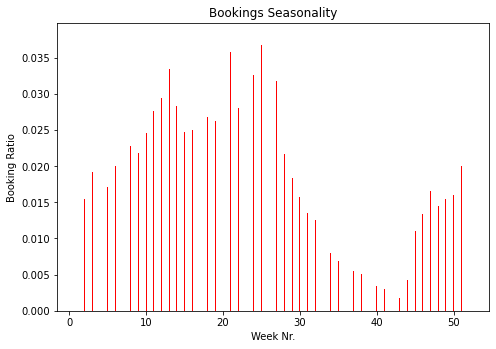

In [19]:
# TODO: rewrite on last df_stage

df['booking_start'] = df['date_time'] + pd.to_timedelta(df['srch_booking_window'], unit='D')  # speedup with vectorize?
display(df[['date_time', 'booking_start']])
df['booking_start_weeknr'] = df['booking_start'].dt.isocalendar().week

groupby_weeknr = df.groupby('booking_start_weeknr')['srch_id'].nunique()
distr_weeknr = groupby_weeknr / df['srch_id'].nunique()
display(groupby_weeknr)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = distr_weeknr.index.tolist()
y = distr_weeknr.values

ax.bar(x, y, 0.1, color='r')
ax.set_ylabel('Booking Ratio')
ax.set_xlabel('Week Nr.')
ax.set_title('Bookings Seasonality')
ax.set_title('Bookings Seasonality')
plt.show()

In [41]:
# TODO: day of week for check-in and check-out
# TODO: US holidays and other christian holidays

# TODO: add price differences per property (from last historic, mean and max)
# TODO: price difference whole dataset => Ursu (2015) suggests cheaper properties have more clicks

# TODO: plot search impressions compared to time of day -> compare USA (219) vs rest to check timezone
# TODO: Add hour of the day as feature (or minutes from midnight?)

# TODO: Add day of week, week nr, month, day data for datetime
# TODO: Add same date data for arrival date and departure date
# TODO: Count how many mondays, tuesdays, etc the stay


In [42]:
# TODO: prop_review_score by average of hotel?








Check class inbalance:

In [33]:
df.groupby('click_bool')['srch_id'].count()

click_bool
0    4736468
1     221879
Name: srch_id, dtype: int64

In [31]:
df.groupby('booking_bool')['srch_id'].count()

booking_bool
0    4819957
1     138390
Name: srch_id, dtype: int64

In [36]:
print('Total instances not clicked and not booked = ', df.groupby('click_bool')['srch_id'].count()[0])
print('Total instances clicked but not booked = ', (df.groupby('click_bool')['srch_id'].count()[1]-df.groupby('booking_bool')['srch_id'].count()[1]))
print('Total instances clicked and booked = ', df.groupby('booking_bool')['srch_id'].count()[1])

Total instances not clicked and not booked =  4736468
Total instances clicked but not booked =  83489
Total instances clicked and booked =  138390


In [43]:
#Check if it is true that all instances booked are also clicked:
df[df['booking_bool']==1]['click_bool'].describe()

count    138390.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: click_bool, dtype: float64

In [96]:
def boxplot_compare(column):
    not_clicked_not_booked = df.loc[(df.click_bool==0) & (df.booking_bool==0)][column]
    clicked_not_booked = df.loc[(df.click_bool==1) & (df.booking_bool==0)][column]
    clicked_and_booked = df.loc[df.booking_bool==1][column]
    
    plt.figure(figsize=(16,8))
    sns.boxplot(data=[not_clicked_not_booked, clicked_not_booked, clicked_and_booked])
    plt.xticks(plt.xticks()[0], ['Not clicked or booked', 'Clicked but not booked', 'Booked'])

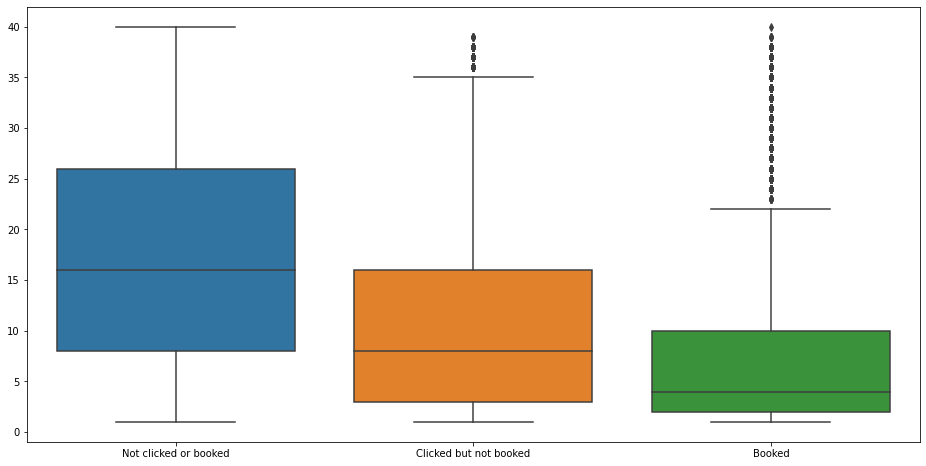

In [105]:
boxplot_compare('position')

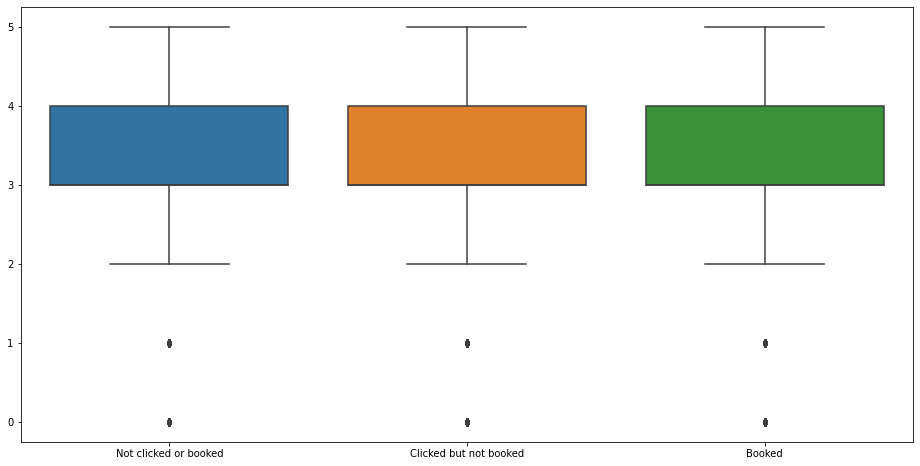

In [106]:
boxplot_compare('prop_starrating')

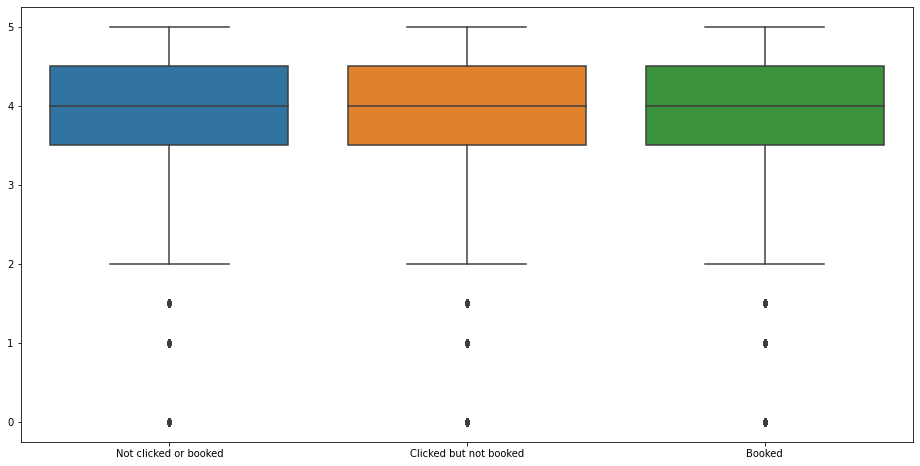

In [107]:
boxplot_compare('prop_review_score')

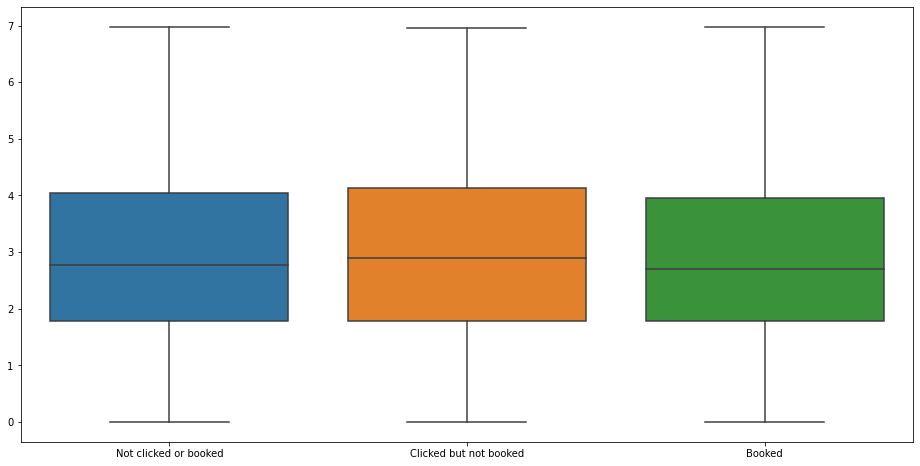

In [108]:
boxplot_compare('prop_location_score1')

In [116]:
df.groupby('booking_bool')['promotion_flag'].mean()

booking_bool
0    0.213108
1    0.303107
Name: promotion_flag, dtype: float64

In [117]:
df.groupby('click_bool')['promotion_flag'].mean()

click_bool
0    0.212109
1    0.290559
Name: promotion_flag, dtype: float64

Check if there is a correlation between variables and position:

In [129]:
df_non_random = df[df['random_bool']==0]

<AxesSubplot:xlabel='prop_review_score', ylabel='position'>

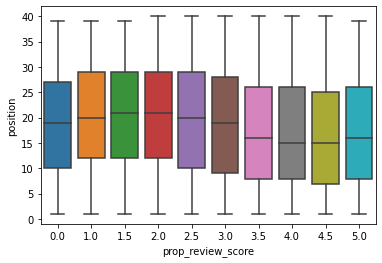

In [132]:
sns.boxplot(x='prop_review_score', y='position', data=df_non_random)

<AxesSubplot:xlabel='prop_starrating', ylabel='position'>

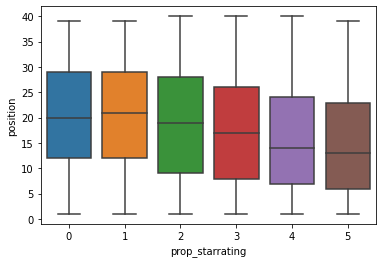

In [133]:
sns.boxplot(x='prop_starrating', y='position', data=df_non_random)